#### Usage

This file has 5 parts:

1. Loading data (same as the previous 2 questions)
2. Creating the classifier function: Based off the 200 sample dataset
3. Predicting and plotting
4. Generating noise (same as previous question)
5. Calculating accuracy

Usage: Run all the cells and configure the K value when plotting

#### Part 1: Loading Data

In [164]:
# Initialize the libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

num_samples = 100

mu = [4, 7]
cov = [[9.0, 3.0], [3.0, 10.0]]

mu_2 = [5, 10]
cov_2 = [[7.0, 0.0], [0.0, 16.0]]

In [165]:
# Function to generate data

def generate_sample(mu, cov, count=num_samples):
    sample = np.random.multivariate_normal(mu, cov, count)
    return sample

In [166]:
# Data Generation

data_1 = generate_sample(mu, cov)
data_2 = generate_sample(mu_2, cov_2)

In [167]:
# Appending class labels to each datapoint 
labeled_data_1 = [np.concatenate((arr, ['A']),axis=0) for arr in data_1]
labeled_data_2 = [np.concatenate((arr, ['B']),axis=0) for arr in data_2]
labeled_data = np.vstack((labeled_data_1, labeled_data_2))
labeled_data.shape

(200, 3)

#### Part 2: Create Classifier Function

In [168]:
# Classifies a single datapoint

def calc_distance(a, b):
    return ((float(b[0])-float(a[0]))**2+(float(b[1])-float(a[1]))**2)**0.5

def classify_single(K, datapoint):
    distances = []
    for i in labeled_data:
        distances.append([i[2], calc_distance(datapoint, i)])

    distances.sort(key = lambda x: x[1])
    classes = list(item[0] for item in distances[0:K])
    classification_class = max(set(classes), key=classes.count)

    return 1 if classification_class == "A" else 0


#### Part 3: Plot

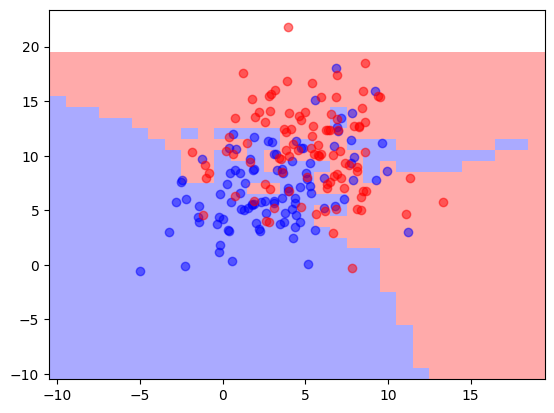

In [169]:
from matplotlib.colors import ListedColormap

K = 5

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Defining the axis
xx, yy = np.meshgrid(np.arange(-10, 20, 1),
                        np.arange(-10, 20, 1))

# Classifying each datapoint
Z = np.array([classify_single(K, item) for item in np.c_[xx.ravel(), yy.ravel()]])

# Plot the decision boundaries
Z = Z.reshape(xx.shape)
ax1.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

# Plot the data
ax1.scatter(data_1[:, 0], data_1[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(data_2[:, 0], data_2[:, 1], c='r', alpha=0.5, label='Class 2')


#### Part 4: Generate Noisy Data

In [170]:
mu_noise = [0, 0]
cov_noise = [[1, 0], [0, 1]]

noise = generate_sample(mu_noise, cov_noise, 100)
new_data_1 = generate_sample(mu, cov, 50)
new_data_2 = generate_sample(mu_2, cov_2, 50)

noisy_data_1 = new_data_1 + noise[0:50]
noisy_data_2 = new_data_2 + noise[50:100]

#### Part 5: Calculate Accuracy

In [171]:
def calc_single_accuracy(K, data, classification):
    correct_predictions = 0
    for datapoint in data:
        label = classify_single(K, datapoint)
        if label == classification:
            correct_predictions += 1
    return correct_predictions / len(data)    

def calc_accuracy(K):
    return (calc_single_accuracy(K, noisy_data_1, 1) + calc_single_accuracy(K, noisy_data_2, 0)) / 2
        

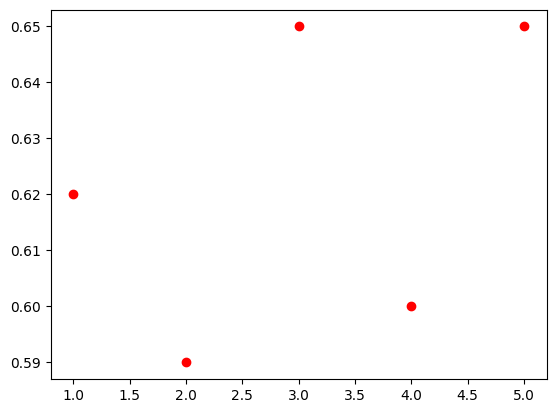

In [172]:
for i in range(5):
    accuracy_K = calc_accuracy(i+1)
    plt.plot((i+1), accuracy_K, 'ro-')

